<a href="https://colab.research.google.com/github/MohammadQasim03/Intelligence-Systems-C0559/blob/main/2Copy_of_IRIS_CNN_NEW_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/40
3/3 [==============================] - 3s 393ms/step - loss: 1.0595 - accuracy: 0.4643 - val_loss: 0.9849 - val_accuracy: 0.5714
Epoch 2/40
3/3 [==============================] - 0s 55ms/step - loss: 0.9095 - accuracy: 0.7024 - val_loss: 0.8822 - val_accuracy: 0.5714
Epoch 3/40
3/3 [==============================] - 0s 74ms/step - loss: 0.8141 - accuracy: 0.6905 - val_loss: 0.7949 - val_accuracy: 0.5714
Epoch 4/40
3/3 [==============================] - 0s 43ms/step - loss: 0.7294 - accuracy: 0.7024 - val_loss: 0.7209 - val_accuracy: 0.6190
Epoch 5/40
3/3 [==============================] - 0s 46ms/step - loss: 0.6434 - accuracy: 0.7262 - val_loss: 0.6565 - val_accuracy: 0.6667
Epoch 6/40
3/3 [==============================] - 0s 113ms/step - loss: 0.5841 - accuracy: 0.7500 - val_loss: 0.6009 - val_accuracy: 0.7143
Epoch 7/40
3/3 [==============================] - 0s 58ms/step - loss: 0.5350 - accuracy: 0.7857 - val_loss: 0.5495 - val_accuracy: 0.7619
Epoch 8/40
3/3 [=========

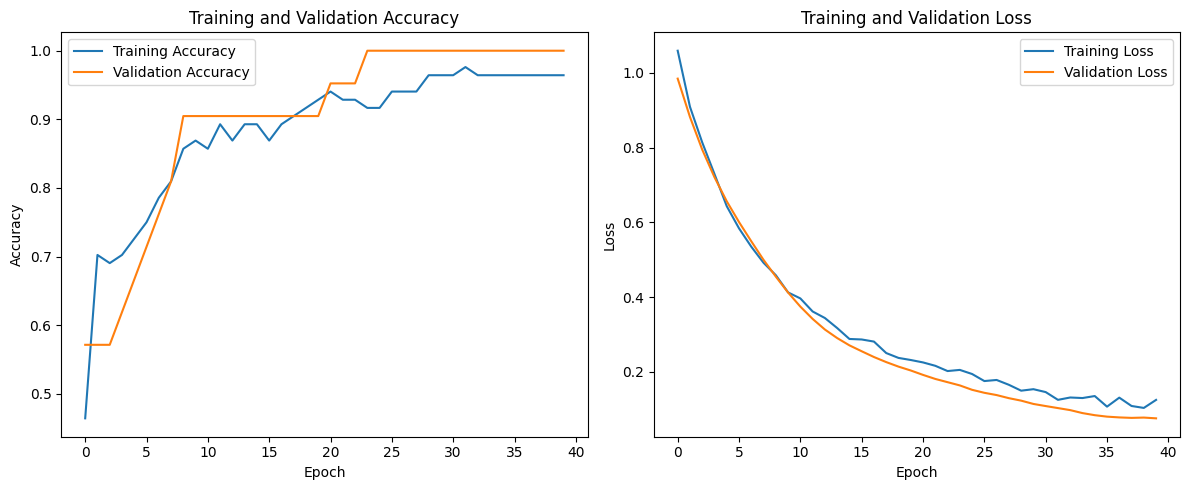


Final Training Accuracy: 0.9643
Final Validation Accuracy: 1.0000
Final Training Loss: 0.1251
Final Validation Loss: 0.0758
4/4 [==============================] - 0s 5ms/step - loss: 0.0938 - accuracy: 0.9714
Training accuracy: 97.14%
2/2 [==============================] - 0s 15ms/step - loss: 0.1480 - accuracy: 0.9556
Testing accuracy: 95.56%
2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



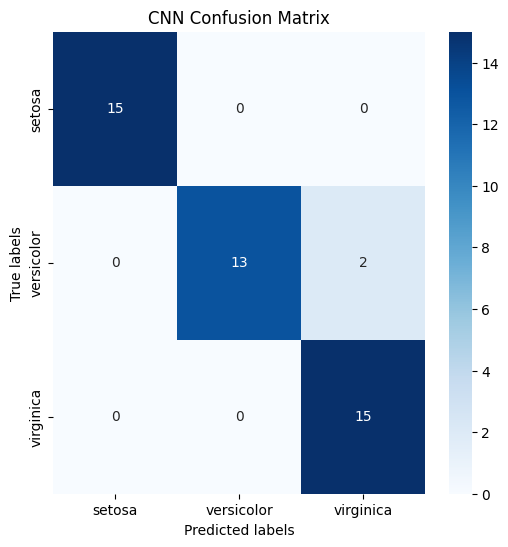

Total Execution Time: 8.03 seconds


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
import time

# Function to load and preprocess the Iris dataset
def load_and_preprocess_data():
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Encode target labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Reshape features for CNN input
    X_reshaped = X_scaled[:, :, np.newaxis]

    return X_reshaped, y_encoded, iris.target_names

# Function to build the CNN model
def build_cnn_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print the final metrics
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print("\nFinal Training Accuracy: {:.4f}".format(final_train_accuracy))
    print("Final Validation Accuracy: {:.4f}".format(final_val_accuracy))
    print("Final Training Loss: {:.4f}".format(final_train_loss))
    print("Final Validation Loss: {:.4f}".format(final_val_loss))

# Function to evaluate model accuracy
def evaluate_model(model, X_data, y_data, data_name):
    loss, accuracy = model.evaluate(X_data, y_data)
    print(f"{data_name} accuracy: {accuracy * 100:.2f}%")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, target_names):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("CNN Confusion Matrix")
    plt.show()

def main():
    # Load and preprocess data
    X, y, target_names = load_and_preprocess_data()

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    # Build CNN model
    model = build_cnn_model(input_shape=X_train.shape[1:], num_classes=len(np.unique(y)))

    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train model
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=40, validation_split=0.2, batch_size=32)
    end_time = time.time()

    # Calculate training time
    training_time = end_time - start_time
    print(f"Training Time: {training_time:.2f} seconds")

    # Display model summary
    model.summary()

    # Plot training history
    plot_training_history(history)

    # Evaluate model on training set
    evaluate_model(model, X_train, y_train, "Training")

    # Evaluate model on testing set
    evaluate_model(model, X_test, y_test, "Testing")

    # Generate predictions and display classification report and confusion matrix
    y_pred = model.predict(X_test).argmax(axis=1)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, target_names)

    # Calculate total execution time
    total_execution_time = end_time - start_time
    print(f"Total Execution Time: {total_execution_time:.2f} seconds")

if __name__ == "__main__":
    main()
